### Import the needed packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score

### **Attribute Information**
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### Get the dataset

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
print(dataset.shape)
print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
print(dataset.dtypes)
print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
print(dataset.head())
print('\033[1m' + '------------------ Tail ------------------' + '\033[0m')
print(dataset.head())
print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
print(dataset.nunique())
print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
print(dataset.isnull().sum())
print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
print(dataset.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
print('\033[1m' + '------------------ Sample ------------------' + '\033[0m')
print(dataset.sample(5))

------------------ Shape ------------------
(918, 12)
------------------ Types ------------------
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
------------------ Head ------------------
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [ ]:
# Feature set 
# The target will not be included 
X = dataset.iloc[:, :-1]

# The target will be the last column
y = dataset.iloc[:, -1]

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
# Encoding categorical features
## I use the Label encoder because it's will not add more columns to the dataset and more simple to run

le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [ ]:
# Splitting the data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Neural Network Models**

In [ ]:
### Initializing the ANN

ann1 = tf.keras.models.Sequential()
ann2 = tf.keras.models.Sequential()
ann3 = tf.keras.models.Sequential()
ann4 = tf.keras.models.Sequential()

### Neural Network Layers


In [ ]:
#First Model
## the hidden layers for the first ANN1 model (4 layers)
ann1.add(tf.keras.layers.Dense(units=14, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=14, activation='tanh'))
ann1.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
#output layer for the first ANN model
ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
#Second Model
#Four hidden layers with TanH, RelU 
ann2.add(tf.keras.layers.Dense(units=4, activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=4, activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))


In [ ]:
## output layer for the Second ANN2 model
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Third Model
## the hidden layers for the Third ANN3 model (3 layers)
ann3.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [ ]:
## output layer for the Third ANN3 model
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Fourth Model  
## the hidden layers for the Fourth ANN4 model (3 layers)

ann4.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann4.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann4.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [ ]:
## output layer for the Fourth ANN4 model
ann4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Compile the ANN Models


In [ ]:
# Compile the ANN1 model
ann1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',
                                                                          metrics.Precision(),
                                                                         metrics.Recall()])
# Compile the ANN2 model
ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',
                                                                          metrics.Precision(),
                                                                         metrics.Recall()])
# Compile the ANN3 model
ann3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',
                                                                          metrics.Precision(),
                                                                         metrics.Recall()])
# Compile the ANN4 model
ann4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',
                                                                          metrics.Precision(),
                                                                         metrics.Recall()])

# Fit the Models 


In [ ]:
## fitting the first ANN model

history1 = ann1.fit(X_train, y_train.values, batch_size = 16, epochs = 100)


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.5463 - precision_1: 0.5463 - recall_1: 1.0000
Epoch 8/100
46/46 [=

In [ ]:
## fitting the Second ANN2 model
history2= ann2.fit(X_train, y_train.values, batch_size = 62, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.6267
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6635
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6921
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.7166
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.7302
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.7452
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.7520
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.7670
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7698
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7779
Epoch 11/

In [ ]:
## fitting the Third ANN3 model
history3 =ann3.fit(X_train, y_train.values, batch_size = 20, epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.7660 - accuracy: 0.4360
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.5109
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5817
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6608
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7262
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.7738
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7997
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8229
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.8351
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8501
Epoch 11/

In [ ]:
## fitting the Fourth ANN4 model
history4= ann4.fit(X_train, y_train.values, batch_size = 62, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6422 - accuracy: 0.4782
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.5777
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.6621
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.7153
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7548
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7711
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.7820
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.8011
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.8038
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.8093
Epoch 11/

### Plot your model’s training history.

First Model

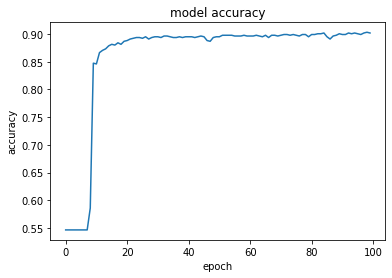

In [ ]:
# plot history for accuracy of the first ANN model
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# predict test set result for the first ANN model
y_pred1 = ann1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

6/6 [==============================] - 0s 3ms/step


Second Model

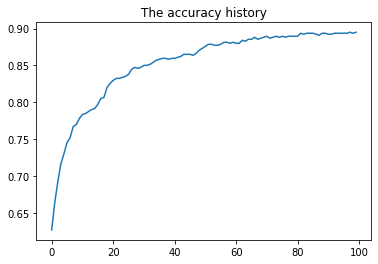

In [ ]:
# plot history for accuracy of the second ANN model

plt.plot(history2.history['accuracy'])
plt.title('The accuracy history')
plt.show()

In [ ]:
# Predicting the Test set results of Second Model
y_pred2 = ann2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

6/6 [==============================] - 0s 3ms/step


Third Model

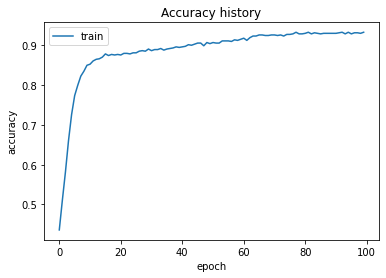

In [ ]:
# plot history for accuracy of the Third ANN3 model

plt.plot(history3.history['accuracy'])
plt.title('Accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

In [ ]:
# Predicting the Test set results of Third Model

y_pred3 = ann3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

6/6 [==============================] - 0s 3ms/step


Fourth Model

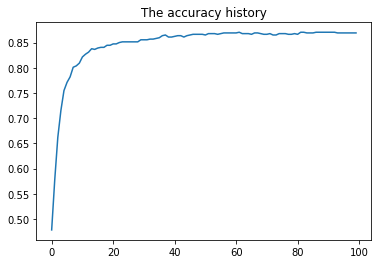

In [ ]:
# plot history for accuracy of the Fourth ANN4 model

plt.plot(history4.history['accuracy'])
plt.title('The accuracy history')
plt.show()

In [ ]:
# Predicting the Test set results of Fourth Model
y_pred4 = ann4.predict(X_test)
y_pred4 = (y_pred4 > 0.5)

6/6 [==============================] - 0s 3ms/step


### Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        77
           1       0.85      0.82      0.83       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



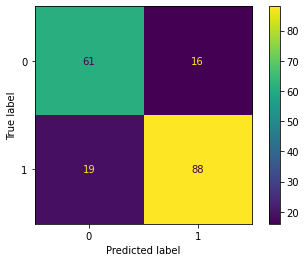

In [ ]:
#Confusion Matrix ofthe first ANN model ANN1
cm1 = confusion_matrix(y_test, y_pred1)

print(classification_report(y_test, y_pred1))


disp = ConfusionMatrixDisplay(confusion_matrix=cm1)

disp = disp.plot()

plt.show()

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



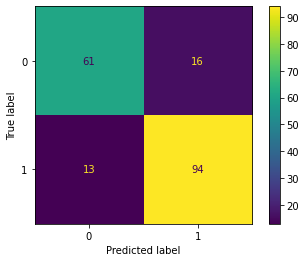

In [ ]:
#Confusion Matrix ofthe Second  model ANN2
cm2 = confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)

disp = disp.plot()

plt.show()


              precision    recall  f1-score   support

           0       0.85      0.79      0.82        77
           1       0.86      0.90      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



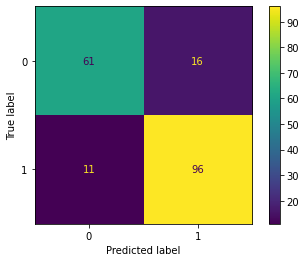

In [ ]:
#Confusion Matrix ofthe Third ANN model ANN3
cm3 = confusion_matrix(y_test, y_pred3)

print(classification_report(y_test, y_pred3))


disp = ConfusionMatrixDisplay(confusion_matrix=cm3)

disp = disp.plot()

plt.show()


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        77
           1       0.84      0.86      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



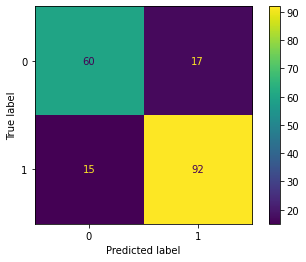

In [ ]:
#Confusion Matrix ofthe Fourth  model ANN4
cm4 = confusion_matrix(y_test, y_pred4)

print(classification_report(y_test, y_pred4))


disp = ConfusionMatrixDisplay(confusion_matrix=cm4)

disp = disp.plot()

plt.show()

# **Classfication Models**

## Models with grid search

 DecisionTreeClassifier grid search

In [ ]:
param_dt = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_dt,
    verbose=1,
    cv=3)

grid_dt.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_dt.best_params_

{'max_leaf_nodes': 12, 'min_samples_split': 3}

In [ ]:
preds_dt = grid_dt.best_estimator_.predict(X_test)
print(classification_report(y_test, preds_dt))


              precision    recall  f1-score   support

           0       0.80      0.83      0.82        77
           1       0.88      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


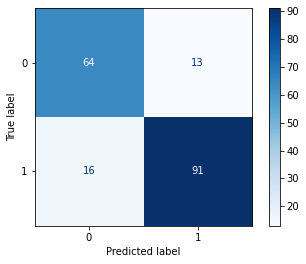

In [ ]:
plot_confusion_matrix(grid_dt, X_test, y_test, cmap='Blues')
plt.show()

**Random Forest Classifier Gridsearch**

In [ ]:
param_rf = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]}

grid_rf = GridSearchCV(
    RandomForestClassifier(),
    param_rf,
    cv=5)

grid_rf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
grid_rf.best_params_

{'max_depth': None, 'n_estimators': 250}

In [ ]:
pred_rf = grid_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.86      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


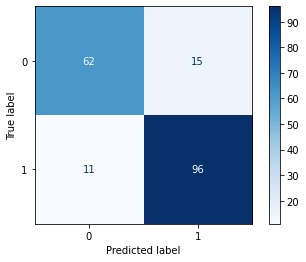

In [ ]:
plot_confusion_matrix(grid_rf.best_estimator_, X=X_test, y_true=y_test, cmap='Blues')

**SVC grid search**

In [ ]:
# Create param grid to hyper parameter tune the model
param_svc ={'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


grid_svc = GridSearchCV(SVC(),
                        param_svc,
                        refit = True,
                        verbose = 3 
                       )
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
pred_svc = grid_svc.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


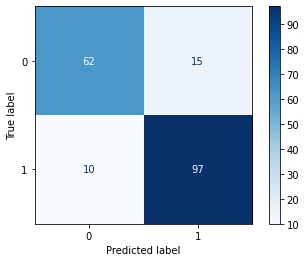

In [ ]:
plot_confusion_matrix(grid_svc.best_estimator_, X=X_test, y_true=y_test, cmap='Blues')

**KNeighborsClassifier grid search**

In [ ]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_knn = dict(n_neighbors = k_range, weights = weight_options)

grid_knn =  GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_knn,
    cv=5)

grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_knn.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [ ]:
pred_knn = grid_knn.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


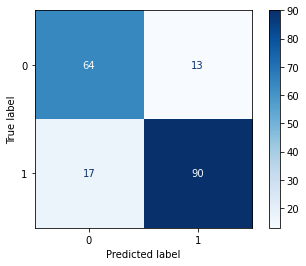

In [ ]:
plot_confusion_matrix(grid_knn.best_estimator_, X=X_test, y_true=y_test, cmap='Blues')

**XGBClassifier grid search**

In [ ]:
param_xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

grid_xg = GridSearchCV(XGBClassifier(),
                   param_xg,
                   n_jobs=5, 
                   cv=5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

grid_xg.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'silent': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [ ]:
grid_xg.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 5,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [ ]:
pred_xg = grid_xg.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_xg))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        77
           1       0.82      0.82      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


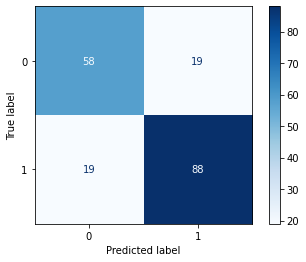

In [ ]:
plot_confusion_matrix(grid_xg.best_estimator_, X=X_test, y_true=y_test, cmap='Blues')

### Classification Evaluation Function

In [ ]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []

def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [LogisticRegression(C = 100.0, penalty = 'l2', solver = 'lbfgs'),
               DecisionTreeClassifier(max_leaf_nodes = 28, min_samples_split = 4),
               RandomForestClassifier(max_depth= None, n_estimators = 100),
               SVC(C = 1000, gamma = 0.0001, kernel= 'rbf'),
               KNeighborsClassifier(n_neighbors = 17, weights = 'uniform'),
               XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.05, max_depth = 6, min_child_weight = 11,
                             missing = -999, n_estimators = 5, nthread = 4, objective ='binary:logistic', seed = 1337,
                             silent = 1, subsample = 0.8)
               ]

In [ ]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Completed RandomForestClassifier model's performance assessment.
Training SVC model...
Completed SVC model training.
Completed SVC model's performance assessment.
Training KNeighborsClassifier model...
Completed KNeighborsClassifier model training.
Completed KNeighborsClassifier model's performance assessment.
Training XGBClassifier model...
Completed XGBClassifier model training.
Completed XGBClassifier model's performance assessment.


## ANN Evaluation added to performance metrics dataframe

In [ ]:
nn_list = [history1, history2, history3, history4]
pred_list = [y_pred1, y_pred2, y_pred3, y_pred4]

def get_nn_metrics(history_, n):
    train_acc = history_.history['accuracy'][-1]
    df_perf_metrics.loc[len(df_perf_metrics.index)] = [
        'ANN '+ str(n+1),
        train_acc,
        accuracy_score(y_test, pred_list[n]),
        precision_score(y_test, pred_list[n]),
        recall_score(y_test, pred_list[n]),
        f1_score(y_test, pred_list[n])
    ]

for n, history in enumerate(nn_list):
    get_nn_metrics(history, n)

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,LogisticRegression,0.859673,0.831522,0.839286,0.878505,0.858447
1,DecisionTreeClassifier,0.918256,0.804348,0.831776,0.831776,0.831776
2,RandomForestClassifier,1.000000,0.853261,0.850877,0.906542,0.877828
3,SVC,0.869210,0.831522,0.839286,0.878505,0.858447
4,KNeighborsClassifier,0.870572,0.836957,0.881188,0.831776,0.855769
5,XGBClassifier,0.851499,0.793478,0.822430,0.822430,0.822430
6,ANN 1,0.901907,0.809783,0.846154,0.822430,0.834123
7,ANN 2,0.895095,0.842391,0.854545,0.878505,0.866359
8,ANN 3,0.933242,0.853261,0.857143,0.897196,0.876712
9,ANN 4,0.869210,0.826087,0.844037,0.859813,0.851852


In [ ]:
#ANN Reports
x1=classification_report(y_test, y_pred1)
x2=classification_report(y_test, y_pred2)
x3=classification_report(y_test, y_pred3)
x4=classification_report(y_test, y_pred4)
print(x1 ,x2 ,x3 ,x4)


              precision    recall  f1-score   support

           0       0.76      0.79      0.78        77
           1       0.85      0.82      0.83       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        77
           1       0.86      0.90      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184
               preci